In [1]:
import uproot as up
import matplotlib.pyplot as plt
import awkward as ak
import pandas as pd
import time

import dill

import DarkNews as dn
from DarkNews import const
from DarkNews.GenLauncher import GenLauncher

import h5py
import numpy as np

import os
import os.path

import importlib

import sys
sys.path.insert(0, '/home/mark/work/DarkNu_Codebase_Nov2021/V4_2022/DarkNews-generator/examples')
sys.path.insert(0,'src/')

#grab some local bits and bobs
from gLEE_tools import *
import MapBuilder as mb
import MasterTools as mst

import ToyAnalysis.analysis_decay as an


uboone_vol=((0.55+254.8)*(115.53+117.47)*(0.1+1036.9))*1.3836*1e-6
print("Volume of MicroBooNE, ",uboone_vol) #-1.504115012818


Volume of MicroBooNE,  85.36524536346


In [2]:
#dfMaster_pckl = 
importlib.reload(mst)

datadir ="/home/mark/work/DarkNu_Codebase_Nov2021/workin_dir/MultiTop_Test_v4.0_FINAL_HOPE/SBNfit_files/"
masterHelper = mst.MasterTools(datadir,"testM1")


Loading Master Oriringal files @  /home/mark/work/DarkNu_Codebase_Nov2021/workin_dir/MultiTop_Test_v4.0_FINAL_HOPE/SBNfit_files/
Loading Master Original FIles @  /home/mark/work/DarkNu_Codebase_Nov2021/workin_dir/MultiTop_Test_v4.0_FINAL_HOPE/SBNfit_files/
Loading master DataFrames from geenration


In [3]:
# bins
simple_bins_energy_e_minus = [0., 10.]
simple_bins_energy_sum =  np.concatenate((np.linspace(0, 0.75, 50, endpoint=True) , np.linspace(0.78, 2, 10, endpoint=True)))
simple_bins_delta_theta = np.concatenate((np.linspace(0, 25, 25, endpoint=True) , np.linspace(26, 180, 10, endpoint=True)))
simple_bins_pz_p_e_plus = [-1,  1.]
simple_bins_pz_p_e_minus = [-1,  1.]
simple_bins_phi_e_minus =  [-180.,  180.]

simple_binning_scheme = (
    simple_bins_energy_e_minus,
    simple_bins_energy_sum,
    simple_bins_delta_theta, 
    simple_bins_pz_p_e_plus, 
    simple_bins_pz_p_e_minus,
    simple_bins_phi_e_minus
)

#importlib.reload(mst)
masterHelper.buildMasterMap(simple_binning_scheme, "datafiles_for_mapping/output_maps/")
masterHelper.loadMasterMap("datafiles_for_mapping/output_maps/")

Building map for testM1_BPA
output will be at datafiles_for_mapping/output_maps//testM1_BPA.hdf5


ValueError: The dimension of bins must be equal to the dimension of the  sample x.

# This is where we load up nonsence

In [350]:
#First load gLEE bits
#TestPointAlhpa
gLEE_TPA_vert = loadgLEE_Bare("/home/mark/work/DarkNu_Codebase_Nov2021/workin_dir/MultiTop_Test_v4.0_FINAL_HOPE/SBNfit_files/vertex_DarkNu_Run1_Keystone_TestPointAlpha_noHF_v50.0.root")
gLEE_TPA_fin = loadgLEE("/home/mark/work/DarkNu_Codebase_Nov2021/workin_dir/MultiTop_Test_v4.0_FINAL_HOPE/SBNfit_files/sbnfit_DarkNu_MultiTop_v4_0_stage_1_KeystoneTestPointAlpha_TextGen.root")

gLEE_TPD_vert = loadgLEE_Bare("/home/mark/work/DarkNu_Codebase_Nov2021/workin_dir/MultiTop_Test_v4.0_FINAL_HOPE/SBNfit_files/vertex_DarkNu_Run1_Keystone_TestPointDelta_noHF_v50.0.root")
gLEE_TPD_fin = loadgLEE("/home/mark/work/DarkNu_Codebase_Nov2021/workin_dir/MultiTop_Test_v4.0_FINAL_HOPE/SBNfit_files/sbnfit_DarkNu_MultiTop_v4_0_stage_1_KeystoneTestPointDelta_TextGen.root")

gLEE_TPP_vert = loadgLEE_Bare("/home/mark/work/DarkNu_Codebase_Nov2021/workin_dir/MultiTop_Test_v4.0_FINAL_HOPE/SBNfit_files/vertex_DarkNu_Run1_Keystone_TestPointPi_noHF_v50.0.root")
gLEE_TPP_fin = loadgLEE("/home/mark/work/DarkNu_Codebase_Nov2021/workin_dir/MultiTop_Test_v4.0_FINAL_HOPE/SBNfit_files/sbnfit_DarkNu_MultiTop_v4_0_stage_1_KeystoneTestPointPi_TextGen.root")

gLEE_TPG_vert = loadgLEE_Bare("/home/mark/work/DarkNu_Codebase_Nov2021/workin_dir/MultiTop_Test_v4.0_FINAL_HOPE/SBNfit_files/vertex_DarkNu_Run1_Keystone_TestPointGamma_noHF_v50.0.root")
gLEE_TPG_fin = loadgLEE("/home/mark/work/DarkNu_Codebase_Nov2021/workin_dir/MultiTop_Test_v4.0_FINAL_HOPE/SBNfit_files/sbnfit_DarkNu_MultiTop_v4_0_stage_1_KeystoneTestPointGamma_TextGen.root")


In [10]:
#Then load pre-decay PCKL

#df_TPAlpha = pd.read_pickle("/home/mark/work/DarkNu_Codebase_Nov2021/workin_dir/Map_Develop/microboone_study/FilteredMapGeneration/Generate_TestPointAlphaDeltaPi_PC2023/TPAlpha_decayed_v4.pckl")
#df_TPDelta = pd.read_pickle("/home/mark/work/DarkNu_Codebase_Nov2021/workin_dir/Map_Develop/microboone_study/FilteredMapGeneration/Generate_TestPointAlphaDeltaPi_PC2023/TPDelta_decayed_v4.pckl")
#df_TPPi = pd.read_pickle("/home/mark/work/DarkNu_Codebase_Nov2021/workin_dir/Map_Develop/microboone_study/FilteredMapGeneration/Generate_TestPointAlphaDeltaPi_PC2023/TPPi_decayed_v4.pckl")
#df_TPGamma = pd.read_pickle("/home/mark/work/DarkNu_Codebase_Nov2021/workin_dir/Map_Develop/microboone_study/FilteredMapGeneration/Generate_TestPointAlphaDeltaPi_PC2023/TPGamma_decayed_v4.pckl")

print("Alpha: ",df_TPAlpha.attrs['N5_ctau0'], df_TPAlpha['w_event_rate'].sum())
print("Delta: ",df_TPDelta.attrs['N5_ctau0'], df_TPDelta['w_event_rate'].sum())
print("Gamma: ",df_TPGamma.attrs['N5_ctau0'], df_TPGamma['w_event_rate'].sum())
print("Pi: ",df_TPPi.attrs['N5_ctau0'], df_TPPi['w_event_rate'].sum())


Alpha:  1.341668736420315e-12 105.24487585077932
Delta:  32.74428544329297 109.78698168041419
Gamma:  117.19591325129653 131.45522235339035
Pi:  0.04481659598923676 142.37799453444083


In [351]:
#Load all BP info
#First the gLEE files 
direct_nam = "/home/mark/work/DarkNu_Codebase_Nov2021/workin_dir/MultiTop_Test_v4.0_FINAL_HOPE/SBNfit_files/"

gLEE_dfD_fin = loadgLEE(direct_nam+"sbnfit_DarkNu_MultiTop_v4_0_stage_1_DarkNu_KeystoneBenchD_NoHF_TextGen.root")
gLEE_dfD_vert = loadgLEE_Bare(direct_nam+"vertex_DarkNu_Run1_Keystone_BenchD_noHF_v50.0.root")

gLEE_dfA_fin = loadgLEE(direct_nam+"sbnfit_DarkNu_MultiTop_v4_0_stage_1_DarkNu_KeystoneBenchAp_NoHF_TextGen.root")
gLEE_dfA_vert = loadgLEE_Bare(direct_nam+"vertex_DarkNu_Run1_Keystone_BenchAp_noHF_v50.0.root")

gLEE_dfC_fin = loadgLEE(direct_nam+"sbnfit_DarkNu_MultiTop_v4_0_stage_1_DarkNu_KeystoneBenchC_NoHF_TextGen.root")
gLEE_dfC_vert = loadgLEE_Bare(direct_nam+"vertex_DarkNu_Run1_Keystone_BenchC_noHF_v50.0.root")

gLEE_dfB_fin = loadgLEE(direct_nam+"sbnfit_DarkNu_MultiTop_v4_0_stage_1_DarkNu_KeystoneBenchBp_NoHF_TextGen.root")
gLEE_dfB_vert = loadgLEE_Bare(direct_nam+"vertex_DarkNu_Run1_Keystone_BenchBp_noHF_v50.0.root")


#and then the DF's (Non-HS for now)
df_A = pd.read_pickle("/home/mark/work/DarkNu_Codebase_Nov2021/workin_dir/Map_Develop/microboone_study/FilteredMapGeneration/data/microboone_active_tpc_benchmark/3plus2/m5_0.15_m4_0_mzprime_0.03_dirac/pandas_df.pckl")
df_B = pd.read_pickle("/home/mark/work/DarkNu_Codebase_Nov2021/workin_dir/Map_Develop/microboone_study/FilteredMapGeneration/data/microboone_active_tpc_benchmark/3plus2/m5_0.15_m4_0_mzprime_1.25_dirac/pandas_df.pckl")
df_C = pd.read_pickle("/home/mark/work/DarkNu_Codebase_Nov2021/workin_dir/Map_Develop/microboone_study/FilteredMapGeneration/data/microboone_active_tpc_benchmark/3plus2/m5_0.15_m4_0.107_mzprime_0.03_dirac/pandas_df.pckl")
df_D = pd.read_pickle("/home/mark/work/DarkNu_Codebase_Nov2021/workin_dir/Map_Develop/microboone_study/FilteredMapGeneration/data/microboone_active_tpc_benchmark/3plus2/m5_0.15_m4_0.107_mzprime_1.25_dirac/pandas_df.pckl")



In [66]:
#HS will come later
df_HSD = pd.read_pickle("/home/mark/work/python_scripts/gLEE_4_pyton/data/microboone_active_tpc_benchmark/3plus2/m5_0.15_m4_0.107_mzprime_1.25_dirac/pandas_df.pckl")


In [352]:
#And master building
gLEE_Master_fin = pd.concat([gLEE_dfA_fin,gLEE_dfB_fin,gLEE_dfC_fin,gLEE_dfD_fin])
gLEE_Master_vert = pd.concat([gLEE_dfA_vert,gLEE_dfB_vert,gLEE_dfC_vert,gLEE_dfD_vert])


In [343]:
#Calculate correction factors for both TP's and BP's 
potf = 6.6/6.8
TPA_corr_factor = potf*df_TPAlpha.shape[0]/gLEE_TPA_vert.shape[0]
TPD_corr_factor = potf*df_TPDelta.shape[0]/gLEE_TPD_vert.shape[0]
TPP_corr_factor = potf*df_TPPi.shape[0]/gLEE_TPPvert.shape[0]
TPG_corr_factor = potf*df_TPGamma.shape[0]/gLEE_TPGvert.shape[0]
print(TPA_corr_factor,TPD_corr_factor,TPP_corr_factor,TPG_corr_factor)

BPA_corr_factor = df_A.shape[0]/gLEE_dfA_vert.shape[0]
BPB_corr_factor = df_B.shape[0]/gLEE_dfB_vert.shape[0]
BPC_corr_factor = df_C.shape[0]/gLEE_dfC_vert.shape[0]
BPD_corr_factor = df_D.shape[0]/gLEE_dfD_vert.shape[0]
print(BPA_corr_factor,BPB_corr_factor,BPC_corr_factor,BPD_corr_factor)

BP_corr = [BPA_corr_factor,BPB_corr_factor,BPC_corr_factor,BPD_corr_factor]

HSBPD_corr_factor = df_HSD.shape[0]/gLEE_dfD_vert.shape[0]
print(HSBPD_corr_factor)
print(BP_corr)

0.9870490023777525 1.0337296049806786 1.0788781512605041 1.034172391584371
1.1866690240452618 1.180029368575624 1.200214592274678 1.1828676470588235
340.78944852941174
[1.1866690240452618, 1.180029368575624, 1.200214592274678, 1.1828676470588235]


# Some Map Tests

<module 'MapBuilder' from '/home/mark/work/python_scripts/gLEE_4_pyton/MapBuilder.py'>

# Simple Map generation and testing

In [60]:
# bins
simple_bins_energy_e_minus = [0., 10.]
simple_bins_energy_sum =  np.linspace(0, 5, 100, endpoint=True)
simple_bins_delta_theta = [0., 180.]
simple_bins_pz_p_e_plus = [-1,  1.]
simple_bins_pz_p_e_minus = [-1,  1.]
simple_bins_phi_e_minus =  [-180., 180.]

simple_binning_scheme = (
    simple_bins_energy_e_minus,
    simple_bins_energy_sum,
    simple_bins_delta_theta, 
    simple_bins_pz_p_e_plus, 
    simple_bins_pz_p_e_minus,
    simple_bins_phi_e_minus
)


In [105]:
import importlib
importlib.reload(mb)

map_BPD = mb.MapBuilder(df_D,df_D.shape[0])
map_BPD.run()
dir_tree = os.path.dirname("simple_maps/BPD_v1.hdf5")
os.makedirs(dir_tree, exist_ok=True)
map_BPD.build(binning_scheme=simple_binning_scheme, file_name="simple_maps/BPD_v1.hdf5", use_weights=False)

map_TPD= mb.MapBuilder(df_TPDelta,df_TPDelta.shape[0])
map_TPD.run()
dir_tree = os.path.dirname("simple_maps/TPD_v1.hdf5")
os.makedirs(dir_tree, exist_ok=True)
map_TPD.build(binning_scheme=simple_binning_scheme, file_name="simple_maps/TPD_v1.hdf5")

#load back?
m_TPD = h5py.File("simple_maps/TPD_v1.hdf5", "r")
m_BPD = h5py.File("simple_maps/BPD_v1.hdf5", "r")

Time Gen :  0.0021975040435791016
Starting to decay: Sum(w_event_rate)  4992.1346355086935
Time Decay:  0.002412557601928711
Time Gen :  0.0010030269622802734
Starting to decay: Sum(w_event_rate)  109.78698168041419
Time Decay:  0.0009343624114990234
Including Weights


In [106]:
start = time.time()
gLEE_dfD_fin['simple_weights_DtoTPD'] = gLEE_dfD_fin.apply(lambda x: getWeight(m_BPD,  m_TPD, np.array([x['true_energy_e_minus'], x['true_energy_sum'], x['true_delta_theta'], x['true_pz_p_e_plus'],x['true_pz_p_e_minus'], x['true_phi_e_minus']])) , axis=1);
end = time.time()
print(end - start)

6.725702285766602


In [107]:
#Count some values
print("--- Simple BPD to TPD ---")
print("Outside Binning: ",gLEE_dfD_fin[gLEE_dfD_fin['simple_weights_DtoTPD']==-999]['simple_weights_DtoTPD'].count())
print("Div by Zero: ",gLEE_dfD_fin[gLEE_dfD_fin['simple_weights_DtoTPD']==-1e-10]['simple_weights_DtoTPD'].count())
print("Zero: ",gLEE_dfD_fin[gLEE_dfD_fin['simple_weights_DtoTPD']==0]['simple_weights_DtoTPD'].count())
print("Valid: ",gLEE_dfD_fin[gLEE_dfD_fin['simple_weights_DtoTPD']>0]['simple_weights_DtoTPD'].count())
print("Mean Non-zero Weight: ",gLEE_dfD_fin[gLEE_dfD_fin['simple_weights_DtoTPD']>0]['simple_weights_DtoTPD'].mean())
print("Mean Weight: ",gLEE_dfD_fin['simple_weights_DtoTPD'].mean())


--- Simple BPD to TPD ---
Outside Binning:  0
Div by Zero:  0
Zero:  0
Valid:  4640
Mean Non-zero Weight:  0.0038720896
Mean Weight:  0.0038720896


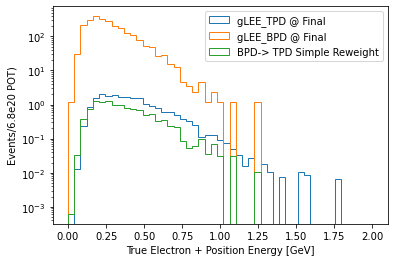

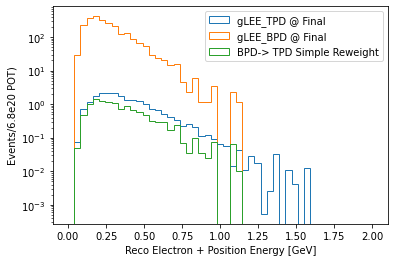

In [112]:
esum_bins=np.linspace(0, 2.0, 50)
plt.hist(gLEE_TPD_fin["true_energy_sum"],bins=esum_bins, weights=TPD_corr_factor*gLEE_TPD_fin["simple_weight"]*gLEE_TPD_fin["pass_selection"], histtype=u'step', label='gLEE_TPD @ Final')
plt.hist(gLEE_dfD_fin["true_energy_sum"],bins=esum_bins, weights=BPD_corr_factor*gLEE_dfD_fin["pass_selection"], histtype=u'step', label='gLEE_BPD @ Final' )
plt.hist(gLEE_dfD_fin["true_energy_sum"],bins=esum_bins, weights=BPD_corr_factor*gLEE_dfD_fin['simple_weights_DtoTPD']*gLEE_dfD_fin["pass_selection"], histtype=u'step', label='BPD-> TPD Simple Reweight' )
plt.legend()
plt.ylabel('Events/6.8e20 POT)')
plt.xlabel('True Electron + Position Energy [GeV]')
plt.yscale('log')
plt.savefig('simple_test_truth_BPD_to_TPD.pdf')  
plt.show()
esum_bins=np.linspace(0, 2.0, 50)
plt.hist(gLEE_TPD_fin["reco_energy"]/1000.,bins=esum_bins, weights=TPD_corr_factor*gLEE_TPD_fin["simple_weight"]*gLEE_TPD_fin["pass_selection"], histtype=u'step', label='gLEE_TPD @ Final')
plt.hist(gLEE_dfD_fin["reco_energy"]/1000.,bins=esum_bins, weights=BPD_corr_factor*gLEE_dfD_fin["pass_selection"], histtype=u'step', label='gLEE_BPD @ Final ' )
plt.hist(gLEE_dfD_fin["reco_energy"]/1000.,bins=esum_bins, weights=BPD_corr_factor*gLEE_dfD_fin['simple_weights_DtoTPD']*gLEE_dfD_fin["pass_selection"], histtype=u'step', label='BPD-> TPD Simple Reweight' )
plt.legend()
plt.ylabel('Events/6.8e20 POT)')
plt.xlabel('Reco Electron + Position Energy [GeV]')
plt.yscale('log')
plt.savefig('simple_test_reco_BPD_to_TPD.pdf')  
plt.show()

# Master Map tests - TPD

In [245]:
# bins
simple_bins_energy_e_minus = [0., 10.]
simple_bins_energy_sum =  np.concatenate((np.linspace(0, 0.75, 50, endpoint=True) , np.linspace(0.78, 2, 10, endpoint=True)))
simple_bins_delta_theta = np.concatenate((np.linspace(0, 25, 25, endpoint=True) , np.linspace(26, 180, 10, endpoint=True)))
simple_bins_pz_p_e_plus = [-1,  1.]
simple_bins_pz_p_e_minus = [-1,  1.]
simple_bins_phi_e_minus =  [-180.,  180.]

simple_binning_scheme = (
    simple_bins_energy_e_minus,
    simple_bins_energy_sum,
    simple_bins_delta_theta, 
    simple_bins_pz_p_e_plus, 
    simple_bins_pz_p_e_minus,
    simple_bins_phi_e_minus
)


In [246]:
import importlib
importlib.reload(mb)

m_TPD.close()
m_BPA.close()
m_BPB.close()
m_BPC.close()
m_BPD.close()


map_BPD = mb.MapBuilder(df_D,df_D.shape[0])
map_BPD.run()
dir_tree = os.path.dirname("simple_maps/BPD_v1.hdf5")
os.makedirs(dir_tree, exist_ok=True)
map_BPD.build(binning_scheme=simple_binning_scheme, file_name="simple_maps/BPD_v1.hdf5", use_weights=False)

map_BPA = mb.MapBuilder(df_A,df_A.shape[0])
map_BPA.run()
dir_tree = os.path.dirname("simple_maps/BPA_v1.hdf5")
os.makedirs(dir_tree, exist_ok=True)
map_BPA.build(binning_scheme=simple_binning_scheme, file_name="simple_maps/BPA_v1.hdf5", use_weights=False)

map_BPB = mb.MapBuilder(df_B,df_B.shape[0])
map_BPB.run()
dir_tree = os.path.dirname("simple_maps/BPB_v1.hdf5")
os.makedirs(dir_tree, exist_ok=True)
map_BPB.build(binning_scheme=simple_binning_scheme, file_name="simple_maps/BPB_v1.hdf5", use_weights=False)

map_BPC = mb.MapBuilder(df_C,df_C.shape[0])
map_BPC.run()
dir_tree = os.path.dirname("simple_maps/BPC_v1.hdf5")
os.makedirs(dir_tree, exist_ok=True)
map_BPC.build(binning_scheme=simple_binning_scheme, file_name="simple_maps/BPC_v1.hdf5", use_weights=False)

map_TPD= mb.MapBuilder(df_TPDelta,df_TPDelta.shape[0])
map_TPD.run()
dir_tree = os.path.dirname("simple_maps/TPD_v1.hdf5")
os.makedirs(dir_tree, exist_ok=True)
map_TPD.build(binning_scheme=simple_binning_scheme, file_name="simple_maps/TPD_v1.hdf5")

#load back?
m_TPD = h5py.File("simple_maps/TPD_v1.hdf5", "r")
m_BPA = h5py.File("simple_maps/BPA_v1.hdf5", "r")
m_BPB = h5py.File("simple_maps/BPB_v1.hdf5", "r")
m_BPC = h5py.File("simple_maps/BPC_v1.hdf5", "r")
m_BPD = h5py.File("simple_maps/BPD_v1.hdf5", "r")

Including Weights


In [247]:
start = time.time()
gLEE_Master_fin['simple_weights_toTPD'] = gLEE_Master_fin.apply(lambda x: getMasterWeight(m_BPA,m_BPB,m_BPC,m_BPD,  m_TPD, np.array([x['true_energy_e_minus'], x['true_energy_sum'], x['true_delta_theta'], x['true_pz_p_e_plus'],x['true_pz_p_e_minus'], x['true_phi_e_minus']]),BP_corr) , axis=1);
end = time.time()
print(end - start)

#Count some values
print("--- Full BPD to TPD ---")
print("Outside Binning: ",gLEE_Master_fin[gLEE_Master_fin['simple_weights_toTPD']==-999]['simple_weights_toTPD'].count())
print("Div by Zero: ",gLEE_Master_fin[gLEE_Master_fin['simple_weights_toTPD']==-1e-10]['simple_weights_toTPD'].count())
print("Zero: ",gLEE_Master_fin[gLEE_Master_fin['simple_weights_toTPD']==0]['simple_weights_toTPD'].count())
print("Valid: ",gLEE_Master_fin[gLEE_Master_fin['simple_weights_toTPD']>0]['simple_weights_toTPD'].count())
print("Mean Non-zero Weight: ",gLEE_Master_fin[gLEE_Master_fin['simple_weights_toTPD']>0]['simple_weights_toTPD'].mean())
print("Mean Weight: ",gLEE_Master_fin['simple_weights_toTPD'].mean())


159.39200472831726
--- Full BPD to TPD ---
Outside Binning:  0
Div by Zero:  0
Zero:  2152
Valid:  41081
Mean Non-zero Weight:  0.001003879634062643
Mean Weight:  0.0009539097274518872


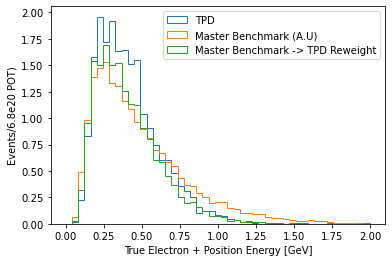

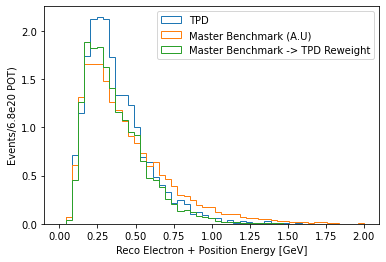

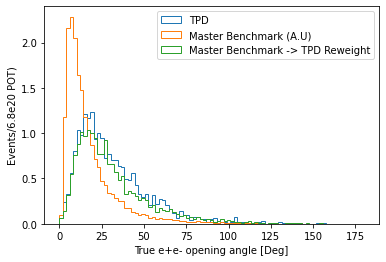

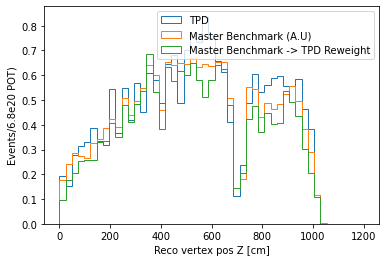

In [249]:
esum_bins=np.linspace(0, 2.0, 50)
plt.hist(gLEE_TPD_fin["true_energy_sum"],bins=esum_bins, weights=TPD_corr_factor*gLEE_TPD_fin["simple_weight"]*gLEE_TPD_fin["pass_selection"], histtype=u'step', label='TPD')
plt.hist(gLEE_Master_fin["true_energy_sum"],bins=esum_bins, weights=10e-4*gLEE_Master_fin["pass_selection"], histtype=u'step', label='Master Benchmark (A.U)' )
plt.hist(gLEE_Master_fin["true_energy_sum"],bins=esum_bins, weights=1.0*gLEE_Master_fin['simple_weights_toTPD']*gLEE_Master_fin["pass_selection"], histtype=u'step', label='Master Benchmark -> TPD Reweight' )
plt.legend()
plt.ylabel('Events/6.8e20 POT)')
plt.xlabel('True Electron + Position Energy [GeV]')
#plt.yscale('log')
plt.savefig('simple_test_truth_Master_to_TPD.pdf')  
plt.show()
plt.hist(gLEE_TPD_fin["reco_energy"]/1000.,bins=esum_bins, weights=TPD_corr_factor*gLEE_TPD_fin["simple_weight"]*gLEE_TPD_fin["pass_selection"], histtype=u'step', label='TPD')
plt.hist(gLEE_Master_fin["reco_energy"]/1000.,bins=esum_bins, weights=10e-4*gLEE_Master_fin["pass_selection"], histtype=u'step', label='Master Benchmark (A.U) ' )
plt.hist(gLEE_Master_fin["reco_energy"]/1000.,bins=esum_bins, weights=1.0*gLEE_Master_fin['simple_weights_toTPD']*gLEE_Master_fin["pass_selection"], histtype=u'step', label='Master Benchmark -> TPD Reweight' )
plt.legend()
plt.ylabel('Events/6.8e20 POT)')
plt.xlabel('Reco Electron + Position Energy [GeV]')
#plt.yscale('log')
plt.savefig('simple_test_reco_Master_to_TPD.pdf')  
plt.show()


theta_bins=np.linspace(0, 180, 90)
plt.hist(gLEE_TPD_fin["true_delta_theta"],bins=theta_bins, weights=TPD_corr_factor*gLEE_TPD_fin["simple_weight"]*gLEE_TPD_fin["pass_selection"], histtype=u'step', label='TPD ')
plt.hist(gLEE_Master_fin["true_delta_theta"],bins=theta_bins, weights=10e-4*gLEE_Master_fin["pass_selection"], histtype=u'step', label='Master Benchmark (A.U) ' )
plt.hist(gLEE_Master_fin["true_delta_theta"],bins=theta_bins, weights=gLEE_Master_fin['simple_weights_toTPD']*gLEE_Master_fin["pass_selection"], histtype=u'step', label='Master Benchmark -> TPD Reweight' )
plt.legend()
plt.ylabel('Events/6.8e20 POT)')
plt.xlabel('True e+e- opening angle [Deg]')
#plt.yscale('log')
plt.savefig('simple_test_angle_truth_Master_to_TPD.pdf')  
plt.show()

zz_bins=np.linspace(0, 1200, 50)
plt.hist(gLEE_TPD_fin["reco_vertex_z"],bins=zz_bins, weights=TPD_corr_factor*gLEE_TPD_fin["simple_weight"]*gLEE_TPD_fin["pass_selection"], histtype=u'step', label='TPD ')
plt.hist(gLEE_Master_fin["reco_vertex_z"],bins=zz_bins, weights=10e-4*gLEE_Master_fin["pass_selection"], histtype=u'step', label='Master Benchmark (A.U) ' )
plt.hist(gLEE_Master_fin["reco_vertex_z"],bins=zz_bins, weights=gLEE_Master_fin['simple_weights_toTPD']*gLEE_Master_fin["pass_selection"], histtype=u'step', label='Master Benchmark -> TPD Reweight' )
plt.legend()
plt.ylabel('Events/6.8e20 POT)')
plt.xlabel('Reco vertex pos Z [cm]')
#plt.yscale('log')
plt.savefig('simple_test_vertz_reco_Master_to_TPD.pdf')  
plt.show()

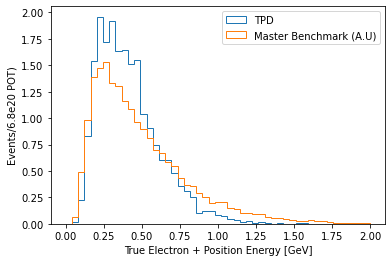

In [208]:
esum_bins=np.linspace(0, 2.0, 50)
plt.hist(gLEE_TPD_fin["true_energy_sum"],bins=esum_bins, weights=TPD_corr_factor*gLEE_TPD_fin["simple_weight"]*gLEE_TPD_fin["pass_selection"], histtype=u'step', label='TPD')
plt.hist(gLEE_Master_fin["true_energy_sum"],bins=esum_bins, weights=10e-4*gLEE_Master_fin["pass_selection"], histtype=u'step', label='Master Benchmark (A.U)' )
#plt.hist(gLEE_Master_fin["true_energy_sum"],bins=esum_bins, weights=1.0*gLEE_Master_fin['simple_weights_toTPD']*gLEE_Master_fin["pass_selection"], histtype=u'step', label='Master Benchmark (A.U)' )
plt.legend()
plt.ylabel('Events/6.8e20 POT)')
plt.xlabel('True Electron + Position Energy [GeV]')
#plt.yscale('log')
plt.savefig('A1.pdf')  
plt.show()


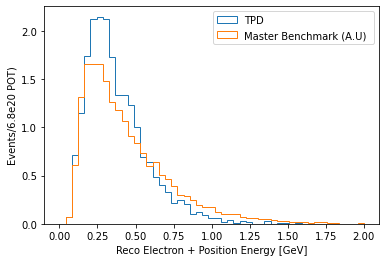

In [207]:
plt.hist(gLEE_TPD_fin["reco_energy"]/1000.,bins=esum_bins, weights=TPD_corr_factor*gLEE_TPD_fin["simple_weight"]*gLEE_TPD_fin["pass_selection"], histtype=u'step', label='TPD')
plt.hist(gLEE_Master_fin["reco_energy"]/1000.,bins=esum_bins, weights=10e-4*gLEE_Master_fin["pass_selection"], histtype=u'step', label='Master Benchmark (A.U) ' )
#plt.hist(gLEE_Master_fin["reco_energy"]/1000.,bins=esum_bins, weights=1.0*gLEE_Master_fin['simple_weights_toTPD']*gLEE_Master_fin["pass_selection"], histtype=u'step', label='Master-> TPD Full Reweight' )
plt.legend()
plt.ylabel('Events/6.8e20 POT)')
plt.xlabel('Reco Electron + Position Energy [GeV]')
#plt.yscale('log')
plt.savefig('A2.pdf')  
plt.show()


# Master Map tests - TPpi

In [379]:
simple_bins_energy_e_minus = [0,10] #np.linspace(0, 1.5, 20, endpoint=True) 
simple_bins_energy_sum = np.linspace(0, 2, 40, endpoint=True)
simple_bins_delta_theta = np.linspace(0, 180, 40, endpoint=True)
simple_bins_pz_p_e_plus = [-1,1]
simple_bins_pz_p_e_minus = [-1,1]
simple_bins_phi_e_minus = [-180,180] #np.linspace(-180, 180, 20, endpoint=True)
simple_bins_pos_decay_z = np.linspace(-520, 520, 40, endpoint=True)


simple_binning_scheme = (
    simple_bins_energy_e_minus,
    simple_bins_energy_sum,
    simple_bins_delta_theta, 
    simple_bins_pz_p_e_plus, 
    simple_bins_pz_p_e_minus,
    simple_bins_phi_e_minus,
    simple_bins_pos_decay_z 


SyntaxError: '(' was never closed (2089699644.py, line 10)

In [380]:
import importlib
importlib.reload(mb)

m_TPP.close()

map_TPP= mb.MapBuilder(df_TPPi,df_TPPi.shape[0])
map_TPP.run()
dir_tree = os.path.dirname("simple_maps/TPP_v1.hdf5")
os.makedirs(dir_tree, exist_ok=True)
map_TPP.build(binning_scheme=simple_binning_scheme, file_name="simple_maps/TPP_v1.hdf5")

#load back?
m_TPP = h5py.File("simple_maps/TPP_v1.hdf5", "r")


m_TPD.close()
m_BPA.close()
m_BPB.close()
m_BPC.close()
m_BPD.close()


map_BPD = mb.MapBuilder(df_D,df_D.shape[0])
map_BPD.run()
dir_tree = os.path.dirname("simple_maps/BPD_v1.hdf5")
os.makedirs(dir_tree, exist_ok=True)
map_BPD.build(binning_scheme=simple_binning_scheme, file_name="simple_maps/BPD_v1.hdf5", use_weights=False)

map_BPA = mb.MapBuilder(df_A,df_A.shape[0])
map_BPA.run()
dir_tree = os.path.dirname("simple_maps/BPA_v1.hdf5")
os.makedirs(dir_tree, exist_ok=True)
map_BPA.build(binning_scheme=simple_binning_scheme, file_name="simple_maps/BPA_v1.hdf5", use_weights=False)

map_BPB = mb.MapBuilder(df_B,df_B.shape[0])
map_BPB.run()
dir_tree = os.path.dirname("simple_maps/BPB_v1.hdf5")
os.makedirs(dir_tree, exist_ok=True)
map_BPB.build(binning_scheme=simple_binning_scheme, file_name="simple_maps/BPB_v1.hdf5", use_weights=False)

map_BPC = mb.MapBuilder(df_C,df_C.shape[0])
map_BPC.run()
dir_tree = os.path.dirname("simple_maps/BPC_v1.hdf5")
os.makedirs(dir_tree, exist_ok=True)
map_BPC.build(binning_scheme=simple_binning_scheme, file_name="simple_maps/BPC_v1.hdf5", use_weights=False)

map_TPD= mb.MapBuilder(df_TPDelta,df_TPDelta.shape[0])
map_TPD.run()
dir_tree = os.path.dirname("simple_maps/TPD_v1.hdf5")
os.makedirs(dir_tree, exist_ok=True)
map_TPD.build(binning_scheme=simple_binning_scheme, file_name="simple_maps/TPD_v1.hdf5")

#load back?
m_TPD = h5py.File("simple_maps/TPD_v1.hdf5", "r")
m_BPA = h5py.File("simple_maps/BPA_v1.hdf5", "r")
m_BPB = h5py.File("simple_maps/BPB_v1.hdf5", "r")
m_BPC = h5py.File("simple_maps/BPC_v1.hdf5", "r")
m_BPD = h5py.File("simple_maps/BPD_v1.hdf5", "r")

Including Weights
Including Weights


In [381]:
start = time.time()
gLEE_Master_fin['simple_weights_toTPP'] = gLEE_Master_fin.apply(lambda x: getMasterWeight(m_BPA,m_BPB,m_BPC,m_BPD,  m_TPP, np.array([x['true_energy_e_minus'], x['true_energy_sum'], x['true_delta_theta'], x['true_pz_p_e_plus'],x['true_pz_p_e_minus'], x['true_phi_e_minus'],x['true_pos_decay_z']]),BP_corr) , axis=1);
end = time.time()
print(end - start)

#Count some values
print("--- Full BPD to TPP ---")
print("Outside Binning: ",gLEE_Master_fin[gLEE_Master_fin['simple_weights_toTPP']==-999]['simple_weights_toTPP'].count())
print("Div by Zero: ",gLEE_Master_fin[gLEE_Master_fin['simple_weights_toTPP']==-1e-10]['simple_weights_toTPP'].count())
print("Zero: ",gLEE_Master_fin[gLEE_Master_fin['simple_weights_toTPP']==0]['simple_weights_toTPP'].count())
print("Valid: ",gLEE_Master_fin[gLEE_Master_fin['simple_weights_toTPP']>0]['simple_weights_toTPP'].count())
print("Mean Non-zero Weight: ",gLEE_Master_fin[gLEE_Master_fin['simple_weights_toTPP']>0]['simple_weights_toTPP'].mean())
print("Mean Weight: ",gLEE_Master_fin['simple_weights_toTPP'].mean())


140.9342176914215
--- Full BPD to TPP ---
Outside Binning:  0
Div by Zero:  0
Zero:  12634
Valid:  30599
Mean Non-zero Weight:  0.001980133289433159
Mean Weight:  0.0014014780034548899


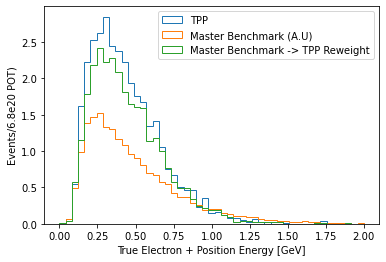

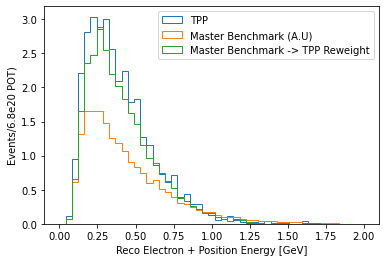

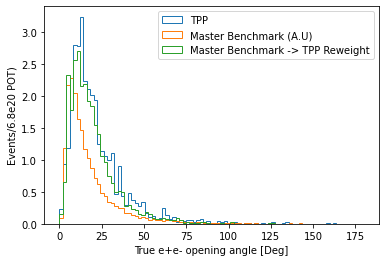

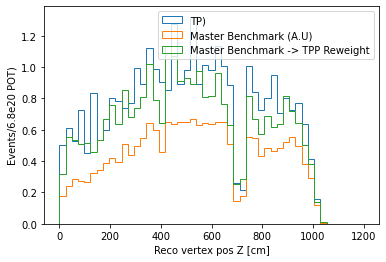

In [386]:
esum_bins=np.linspace(0, 2.0, 50)
plt.hist(gLEE_TPP_fin["true_energy_sum"],bins=esum_bins, weights=TPP_corr_factor*gLEE_TPP_fin["simple_weight"]*gLEE_TPP_fin["pass_selection"], histtype=u'step', label='TPP')
plt.hist(gLEE_Master_fin["true_energy_sum"],bins=esum_bins, weights=10e-4*gLEE_Master_fin["pass_selection"], histtype=u'step', label='Master Benchmark (A.U)' )
plt.hist(gLEE_Master_fin["true_energy_sum"],bins=esum_bins, weights=1.0*gLEE_Master_fin['simple_weights_toTPP']*gLEE_Master_fin["pass_selection"], histtype=u'step', label='Master Benchmark -> TPP Reweight' )
plt.legend()
plt.ylabel('Events/6.8e20 POT)')
plt.xlabel('True Electron + Position Energy [GeV]')
#plt.yscale('log')
plt.savefig('simple_test_truth_Master_to_TPP.pdf')  
plt.show()
plt.hist(gLEE_TPP_fin["reco_energy"]/1000.,bins=esum_bins, weights=TPP_corr_factor*gLEE_TPP_fin["simple_weight"]*gLEE_TPP_fin["pass_selection"], histtype=u'step', label='TPP')
plt.hist(gLEE_Master_fin["reco_energy"]/1000.,bins=esum_bins, weights=10e-4*gLEE_Master_fin["pass_selection"], histtype=u'step', label='Master Benchmark (A.U) ' )
plt.hist(gLEE_Master_fin["reco_energy"]/1000.,bins=esum_bins, weights=1.0*gLEE_Master_fin['simple_weights_toTPP']*gLEE_Master_fin["pass_selection"], histtype=u'step', label='Master Benchmark -> TPP Reweight' )
plt.legend()
plt.ylabel('Events/6.8e20 POT)')
plt.xlabel('Reco Electron + Position Energy [GeV]')
#plt.yscale('log')
plt.savefig('simple_test_reco_Master_to_TPP.pdf')  
plt.show()


theta_bins=np.linspace(0, 180, 90)
plt.hist(gLEE_TPP_fin["true_delta_theta"],bins=theta_bins, weights=TPP_corr_factor*gLEE_TPP_fin["simple_weight"]*gLEE_TPP_fin["pass_selection"], histtype=u'step', label='TPP ')
plt.hist(gLEE_Master_fin["true_delta_theta"],bins=theta_bins, weights=10e-4*gLEE_Master_fin["pass_selection"], histtype=u'step', label='Master Benchmark (A.U) ' )
plt.hist(gLEE_Master_fin["true_delta_theta"],bins=theta_bins, weights=1*gLEE_Master_fin['simple_weights_toTPP']*gLEE_Master_fin["pass_selection"], histtype=u'step', label='Master Benchmark -> TPP Reweight' )
plt.legend()
plt.ylabel('Events/6.8e20 POT)')
plt.xlabel('True e+e- opening angle [Deg]')
#plt.yscale('log')
plt.savefig('simple_test_angle_truth_Master_to_TPP.pdf')  
plt.show()

zz_bins=np.linspace(0, 1200, 50)
plt.hist(gLEE_TPP_fin["reco_vertex_z"],bins=zz_bins, weights=TPP_corr_factor*gLEE_TPP_fin["simple_weight"]*gLEE_TPP_fin["pass_selection"], histtype=u'step', label='TP) ')
plt.hist(gLEE_Master_fin["reco_vertex_z"],bins=zz_bins, weights=10e-4*gLEE_Master_fin["pass_selection"], histtype=u'step', label='Master Benchmark (A.U) ' )
plt.hist(gLEE_Master_fin["reco_vertex_z"],bins=zz_bins, weights=1*gLEE_Master_fin['simple_weights_toTPP']*gLEE_Master_fin["pass_selection"], histtype=u'step', label='Master Benchmark -> TPP Reweight' )
plt.legend()
plt.ylabel('Events/6.8e20 POT)')
plt.xlabel('Reco vertex pos Z [cm]')
#plt.yscale('log')
plt.savefig('simple_test_vertz_reco_Master_to_TPP.pdf')  
plt.show()

# Master Map tests - TPA

In [274]:
# bins
simple_bins_energy_e_minus = [0., 10.]
simple_bins_energy_sum =  np.concatenate((np.linspace(0, 0.75, 50, endpoint=True) , np.linspace(0.78, 2, 10, endpoint=True)))
simple_bins_delta_theta = np.concatenate((np.linspace(0, 25, 25, endpoint=True) , np.linspace(26, 180, 10, endpoint=True)))
simple_bins_pz_p_e_plus = [-1,  1.]
simple_bins_pz_p_e_minus = [-1,  1.]
simple_bins_phi_e_minus =  [-180.,  180.]

simple_binning_scheme = (
    simple_bins_energy_e_minus,
    simple_bins_energy_sum,
    simple_bins_delta_theta, 
    simple_bins_pz_p_e_plus, 
    simple_bins_pz_p_e_minus,
    simple_bins_phi_e_minus
)


In [283]:
import importlib
importlib.reload(mb)



#load back?

m_TPA.close()
m_TPP.close()
m_TPD.close()
m_BPA.close()
m_BPB.close()
m_BPC.close()
m_BPD.close()


map_BPD = mb.MapBuilder(df_D,df_D.shape[0])
map_BPD.run()
dir_tree = os.path.dirname("simple_maps/BPD_v1.hdf5")
os.makedirs(dir_tree, exist_ok=True)
map_BPD.build(binning_scheme=simple_binning_scheme, file_name="simple_maps/BPD_v1.hdf5", use_weights=False)

map_BPA = mb.MapBuilder(df_A,df_A.shape[0])
map_BPA.run()
dir_tree = os.path.dirname("simple_maps/BPA_v1.hdf5")
os.makedirs(dir_tree, exist_ok=True)
map_BPA.build(binning_scheme=simple_binning_scheme, file_name="simple_maps/BPA_v1.hdf5", use_weights=False)

map_BPB = mb.MapBuilder(df_B,df_B.shape[0])
map_BPB.run()
dir_tree = os.path.dirname("simple_maps/BPB_v1.hdf5")
os.makedirs(dir_tree, exist_ok=True)
map_BPB.build(binning_scheme=simple_binning_scheme, file_name="simple_maps/BPB_v1.hdf5", use_weights=False)

map_BPC = mb.MapBuilder(df_C,df_C.shape[0])
map_BPC.run()
dir_tree = os.path.dirname("simple_maps/BPC_v1.hdf5")
os.makedirs(dir_tree, exist_ok=True)
map_BPC.build(binning_scheme=simple_binning_scheme, file_name="simple_maps/BPC_v1.hdf5", use_weights=False)

map_TPD= mb.MapBuilder(df_TPDelta,df_TPDelta.shape[0])
map_TPD.run()
dir_tree = os.path.dirname("simple_maps/TPD_v1.hdf5")
os.makedirs(dir_tree, exist_ok=True)
map_TPD.build(binning_scheme=simple_binning_scheme, file_name="simple_maps/TPD_v1.hdf5")

map_TPP= mb.MapBuilder(df_TPPi,df_TPPi.shape[0])
map_TPP.run()
dir_tree = os.path.dirname("simple_maps/TPP_v1.hdf5")
os.makedirs(dir_tree, exist_ok=True)
map_TPP.build(binning_scheme=simple_binning_scheme, file_name="simple_maps/TPP_v1.hdf5")

map_TPA= mb.MapBuilder(df_TPAlpha,df_TPAlpha.shape[0])
map_TPA.run()
dir_tree = os.path.dirname("simple_maps/TPA_v1.hdf5")
os.makedirs(dir_tree, exist_ok=True)
map_TPA.build(binning_scheme=simple_binning_scheme, file_name="simple_maps/TPA_v1.hdf5")


#load back?
m_TPD = h5py.File("simple_maps/TPD_v1.hdf5", "r")
m_TPP = h5py.File("simple_maps/TPP_v1.hdf5", "r")
m_TPA = h5py.File("simple_maps/TPA_v1.hdf5", "r")

m_BPA = h5py.File("simple_maps/BPA_v1.hdf5", "r")
m_BPB = h5py.File("simple_maps/BPB_v1.hdf5", "r")
m_BPC = h5py.File("simple_maps/BPC_v1.hdf5", "r")
m_BPD = h5py.File("simple_maps/BPD_v1.hdf5", "r")


Including Weights
Including Weights
Including Weights


In [284]:
start = time.time()
gLEE_Master_fin['simple_weights_toTPA'] = gLEE_Master_fin.apply(lambda x: getMasterWeight(m_BPA,m_BPB,m_BPC,m_BPD,  m_TPA, np.array([x['true_energy_e_minus'], x['true_energy_sum'], x['true_delta_theta'], x['true_pz_p_e_plus'],x['true_pz_p_e_minus'], x['true_phi_e_minus']]),BP_corr) , axis=1);
end = time.time()
print(end - start)


125.02326893806458


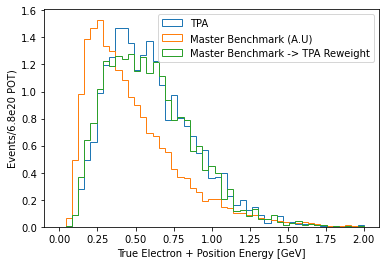

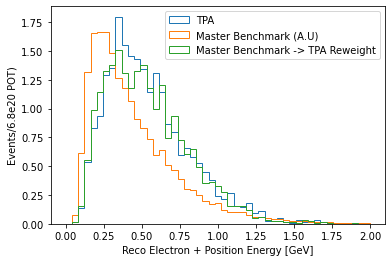

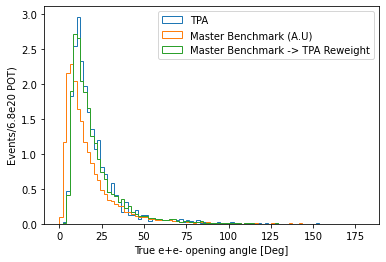

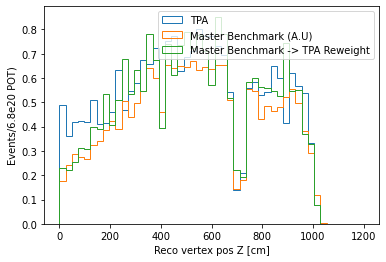

In [285]:
esum_bins=np.linspace(0, 2.0, 50)
plt.hist(gLEE_TPA_fin["true_energy_sum"],bins=esum_bins, weights=TPA_corr_factor*gLEE_TPA_fin["simple_weight"]*gLEE_TPA_fin["pass_selection"], histtype=u'step', label='TPA')
plt.hist(gLEE_Master_fin["true_energy_sum"],bins=esum_bins, weights=10e-4*gLEE_Master_fin["pass_selection"], histtype=u'step', label='Master Benchmark (A.U)' )
plt.hist(gLEE_Master_fin["true_energy_sum"],bins=esum_bins, weights=1.0*gLEE_Master_fin['simple_weights_toTPA']*gLEE_Master_fin["pass_selection"], histtype=u'step', label='Master Benchmark -> TPA Reweight' )
plt.legend()
plt.ylabel('Events/6.8e20 POT)')
plt.xlabel('True Electron + Position Energy [GeV]')
#plt.yscale('log')
plt.savefig('simple_test_truth_Master_to_TPA.pdf')  
plt.show()

plt.hist(gLEE_TPA_fin["reco_energy"]/1000.,bins=esum_bins, weights=TPA_corr_factor*gLEE_TPA_fin["simple_weight"]*gLEE_TPA_fin["pass_selection"], histtype=u'step', label='TPA')
plt.hist(gLEE_Master_fin["reco_energy"]/1000.,bins=esum_bins, weights=10e-4*gLEE_Master_fin["pass_selection"], histtype=u'step', label='Master Benchmark (A.U) ' )
plt.hist(gLEE_Master_fin["reco_energy"]/1000.,bins=esum_bins, weights=1.0*gLEE_Master_fin['simple_weights_toTPA']*gLEE_Master_fin["pass_selection"], histtype=u'step', label='Master Benchmark -> TPA Reweight' )
plt.legend()
plt.ylabel('Events/6.8e20 POT)')
plt.xlabel('Reco Electron + Position Energy [GeV]')
#plt.yscale('log')
plt.savefig('simple_test_reco_Master_to_TPA.pdf')  
plt.show()


theta_bins=np.linspace(0, 180, 90)
plt.hist(gLEE_TPA_fin["true_delta_theta"],bins=theta_bins, weights=TPA_corr_factor*gLEE_TPA_fin["simple_weight"]*gLEE_TPA_fin["pass_selection"], histtype=u'step', label='TPA ')
plt.hist(gLEE_Master_fin["true_delta_theta"],bins=theta_bins, weights=10e-4*gLEE_Master_fin["pass_selection"], histtype=u'step', label='Master Benchmark (A.U) ' )
plt.hist(gLEE_Master_fin["true_delta_theta"],bins=theta_bins, weights=1.0*gLEE_Master_fin['simple_weights_toTPA']*gLEE_Master_fin["pass_selection"], histtype=u'step', label='Master Benchmark -> TPA Reweight' )
plt.legend()
plt.ylabel('Events/6.8e20 POT)')
plt.xlabel('True e+e- opening angle [Deg]')
#plt.yscale('log')
plt.savefig('simple_test_angle_truth_Master_to_TPA.pdf')  
plt.show()

zz_bins=np.linspace(0, 1200, 50)
plt.hist(gLEE_TPA_fin["reco_vertex_z"],bins=zz_bins, weights=TPA_corr_factor*gLEE_TPA_fin["simple_weight"]*gLEE_TPA_fin["pass_selection"], histtype=u'step', label='TPA ')
plt.hist(gLEE_Master_fin["reco_vertex_z"],bins=zz_bins, weights=10e-4*gLEE_Master_fin["pass_selection"], histtype=u'step', label='Master Benchmark (A.U) ' )
plt.hist(gLEE_Master_fin["reco_vertex_z"],bins=zz_bins, weights=1.0*gLEE_Master_fin['simple_weights_toTPA']*gLEE_Master_fin["pass_selection"], histtype=u'step', label='Master Benchmark -> TPA Reweight' )
plt.legend()
plt.ylabel('Events/6.8e20 POT)')
plt.xlabel('Reco vertex pos Z [cm]')
#plt.yscale('log')
plt.savefig('simple_test_vertz_reco_Master_to_TPA.pdf')  
plt.show()

# Master Map tests - TPg

In [336]:
# bins
simple_bins_energy_e_minus = [0., 10.]
simple_bins_energy_sum =  np.concatenate((np.linspace(0, 0.75, 50, endpoint=True) , np.linspace(0.78, 2, 10, endpoint=True)))
simple_bins_delta_theta = np.concatenate((np.linspace(0, 25, 25, endpoint=True) , np.linspace(26, 180, 10, endpoint=True)))
simple_bins_pz_p_e_plus = [-1,  1.]
simple_bins_pz_p_e_minus = [-1,  1.]
simple_bins_phi_e_minus =  [-180.,  180.]
simple_bins_pos_decay_z = [-1000,1000]

simple_binning_scheme = (
    simple_bins_energy_e_minus,
    simple_bins_energy_sum,
    simple_bins_delta_theta, 
    simple_bins_pz_p_e_plus, 
    simple_bins_pz_p_e_minus,
    simple_bins_phi_e_minus,
    simple_bins_pos_decay_z
)


In [358]:
import importlib
importlib.reload(mb)



#load back?
m_TPG.close()
m_TPA.close()
m_TPP.close()
m_TPD.close()
m_BPA.close()
m_BPB.close()
m_BPC.close()
m_BPD.close()


map_BPD = mb.MapBuilder(df_D,df_D.shape[0])
map_BPD.run()
dir_tree = os.path.dirname("simple_maps/BPD_v1.hdf5")
os.makedirs(dir_tree, exist_ok=True)
map_BPD.build(binning_scheme=simple_binning_scheme, file_name="simple_maps/BPD_v1.hdf5", use_weights=False)

map_BPA = mb.MapBuilder(df_A,df_A.shape[0])
map_BPA.run()
dir_tree = os.path.dirname("simple_maps/BPA_v1.hdf5")
os.makedirs(dir_tree, exist_ok=True)
map_BPA.build(binning_scheme=simple_binning_scheme, file_name="simple_maps/BPA_v1.hdf5", use_weights=False)

map_BPB = mb.MapBuilder(df_B,df_B.shape[0])
map_BPB.run()
dir_tree = os.path.dirname("simple_maps/BPB_v1.hdf5")
os.makedirs(dir_tree, exist_ok=True)
map_BPB.build(binning_scheme=simple_binning_scheme, file_name="simple_maps/BPB_v1.hdf5", use_weights=False)

map_BPC = mb.MapBuilder(df_C,df_C.shape[0])
map_BPC.run()
dir_tree = os.path.dirname("simple_maps/BPC_v1.hdf5")
os.makedirs(dir_tree, exist_ok=True)
map_BPC.build(binning_scheme=simple_binning_scheme, file_name="simple_maps/BPC_v1.hdf5", use_weights=False)

map_TPD= mb.MapBuilder(df_TPDelta,df_TPDelta.shape[0])
map_TPD.run()
dir_tree = os.path.dirname("simple_maps/TPD_v1.hdf5")
os.makedirs(dir_tree, exist_ok=True)
map_TPD.build(binning_scheme=simple_binning_scheme, file_name="simple_maps/TPD_v1.hdf5")

map_TPP= mb.MapBuilder(df_TPPi,df_TPPi.shape[0])
map_TPP.run()
dir_tree = os.path.dirname("simple_maps/TPP_v1.hdf5")
os.makedirs(dir_tree, exist_ok=True)
map_TPP.build(binning_scheme=simple_binning_scheme, file_name="simple_maps/TPP_v1.hdf5")

map_TPA= mb.MapBuilder(df_TPAlpha,df_TPAlpha.shape[0])
map_TPA.run()
dir_tree = os.path.dirname("simple_maps/TPA_v1.hdf5")
os.makedirs(dir_tree, exist_ok=True)
map_TPA.build(binning_scheme=simple_binning_scheme, file_name="simple_maps/TPA_v1.hdf5")

map_TPG= mb.MapBuilder(df_TPGamma,df_TPGamma.shape[0])
map_TPG.run()
dir_tree = os.path.dirname("simple_maps/TPG_v1.hdf5")
os.makedirs(dir_tree, exist_ok=True)
map_TPG.build(binning_scheme=simple_binning_scheme, file_name="simple_maps/TPG_v1.hdf5")

#load back?
m_TPD = h5py.File("simple_maps/TPD_v1.hdf5", "r")
m_TPP = h5py.File("simple_maps/TPP_v1.hdf5", "r")
m_TPA = h5py.File("simple_maps/TPA_v1.hdf5", "r")
m_TPG = h5py.File("simple_maps/TPG_v1.hdf5", "r")

m_BPA = h5py.File("simple_maps/BPA_v1.hdf5", "r")
m_BPB = h5py.File("simple_maps/BPB_v1.hdf5", "r")
m_BPC = h5py.File("simple_maps/BPC_v1.hdf5", "r")
m_BPD = h5py.File("simple_maps/BPD_v1.hdf5", "r")


Including Weights
Including Weights
Including Weights
Including Weights


In [362]:
gLEE_Master_fin['true_pos_decay_z']

0       -61.788563
1       216.870434
2       -89.633451
3      -161.504834
4       160.455325
           ...    
4635    147.818217
4636    349.206502
4637     -2.768142
4638   -111.745081
4639     70.111957
Name: true_pos_decay_z, Length: 43233, dtype: float64

In [363]:
start = time.time()
gLEE_Master_fin['simple_weights_toTPG'] = gLEE_Master_fin.apply(lambda x: getMasterWeight(m_BPA,m_BPB,m_BPC,m_BPD,  m_TPG, np.array([x['true_energy_e_minus'], x['true_energy_sum'], x['true_delta_theta'], x['true_pz_p_e_plus'],x['true_pz_p_e_minus'], x['true_phi_e_minus'], x['true_pos_decay_z']]),BP_corr) , axis=1);
end = time.time()
print(end - start)


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

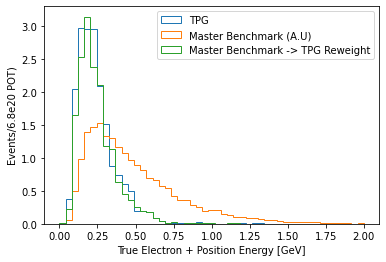

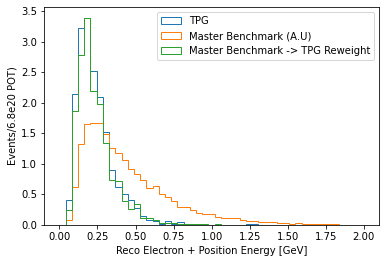

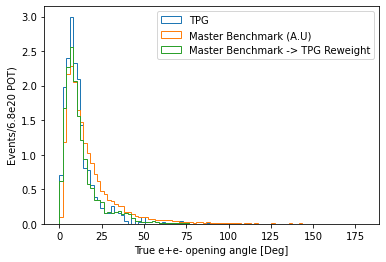

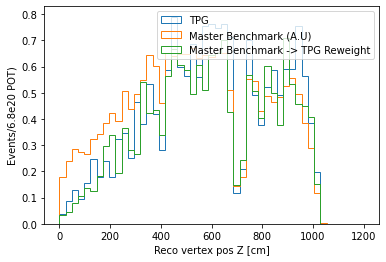

In [301]:
esum_bins=np.linspace(0, 2.0, 50)
plt.hist(gLEE_TPG_fin["true_energy_sum"],bins=esum_bins, weights=TPG_corr_factor*gLEE_TPG_fin["simple_weight"]*gLEE_TPG_fin["pass_selection"], histtype=u'step', label='TPG')
plt.hist(gLEE_Master_fin["true_energy_sum"],bins=esum_bins, weights=10e-4*gLEE_Master_fin["pass_selection"], histtype=u'step', label='Master Benchmark (A.U)' )
plt.hist(gLEE_Master_fin["true_energy_sum"],bins=esum_bins, weights=2*gLEE_Master_fin['simple_weights_toTPG']*gLEE_Master_fin["pass_selection"], histtype=u'step', label='Master Benchmark -> TPG Reweight' )
plt.legend()
plt.ylabel('Events/6.8e20 POT)')
plt.xlabel('True Electron + Position Energy [GeV]')
#plt.yscale('log')
plt.savefig('simple_test_truth_Master_to_TPG.pdf')  
plt.show()

plt.hist(gLEE_TPG_fin["reco_energy"]/1000.,bins=esum_bins, weights=TPG_corr_factor*gLEE_TPG_fin["simple_weight"]*gLEE_TPG_fin["pass_selection"], histtype=u'step', label='TPG')
plt.hist(gLEE_Master_fin["reco_energy"]/1000.,bins=esum_bins, weights=10e-4*gLEE_Master_fin["pass_selection"], histtype=u'step', label='Master Benchmark (A.U) ' )
plt.hist(gLEE_Master_fin["reco_energy"]/1000.,bins=esum_bins, weights=2*gLEE_Master_fin['simple_weights_toTPG']*gLEE_Master_fin["pass_selection"], histtype=u'step', label='Master Benchmark -> TPG Reweight' )
plt.legend()
plt.ylabel('Events/6.8e20 POT)')
plt.xlabel('Reco Electron + Position Energy [GeV]')
#plt.yscale('log')
plt.savefig('simple_test_reco_Master_to_TPG.pdf')  
plt.show()


theta_bins=np.linspace(0, 180, 90)
plt.hist(gLEE_TPG_fin["true_delta_theta"],bins=theta_bins, weights=TPG_corr_factor*gLEE_TPG_fin["simple_weight"]*gLEE_TPG_fin["pass_selection"], histtype=u'step', label='TPG ')
plt.hist(gLEE_Master_fin["true_delta_theta"],bins=theta_bins, weights=10e-4*gLEE_Master_fin["pass_selection"], histtype=u'step', label='Master Benchmark (A.U) ' )
plt.hist(gLEE_Master_fin["true_delta_theta"],bins=theta_bins, weights=2*gLEE_Master_fin['simple_weights_toTPG']*gLEE_Master_fin["pass_selection"], histtype=u'step', label='Master Benchmark -> TPG Reweight' )
plt.legend()
plt.ylabel('Events/6.8e20 POT)')
plt.xlabel('True e+e- opening angle [Deg]')
#plt.yscale('log')
plt.savefig('simple_test_angle_truth_Master_to_TPG.pdf')  
plt.show()

zz_bins=np.linspace(0, 1200, 50)
plt.hist(gLEE_TPG_fin["reco_vertex_z"],bins=zz_bins, weights=TPG_corr_factor*gLEE_TPG_fin["simple_weight"]*gLEE_TPG_fin["pass_selection"], histtype=u'step', label='TPG ')
plt.hist(gLEE_Master_fin["reco_vertex_z"],bins=zz_bins, weights=10e-4*gLEE_Master_fin["pass_selection"], histtype=u'step', label='Master Benchmark (A.U) ' )
plt.hist(gLEE_Master_fin["reco_vertex_z"],bins=zz_bins, weights=2*gLEE_Master_fin['simple_weights_toTPG']*gLEE_Master_fin["pass_selection"], histtype=u'step', label='Master Benchmark -> TPG Reweight' )
plt.legend()
plt.ylabel('Events/6.8e20 POT)')
plt.xlabel('Reco vertex pos Z [cm]')
#plt.yscale('log')
plt.savefig('simple_test_vertz_reco_Master_to_TPG.pdf')  
plt.show()

# Master Map tests - TPg WITH ALL Variables

In [373]:
# bins

simple_bins_energy_e_minus = [0,10] #np.linspace(0, 1.5, 20, endpoint=True) 
simple_bins_energy_sum = np.linspace(0, 2, 40, endpoint=True)
simple_bins_delta_theta = np.linspace(0, 180, 40, endpoint=True)
simple_bins_pz_p_e_plus = [-1,1]
simple_bins_pz_p_e_minus = [-1,1]
simple_bins_phi_e_minus = [-180,180] #np.linspace(-180, 180, 20, endpoint=True)
simple_bins_pos_decay_z = np.linspace(-520, 520, 40, endpoint=True)


simple_binning_scheme = (
    simple_bins_energy_e_minus,
    simple_bins_energy_sum,
    simple_bins_delta_theta, 
    simple_bins_pz_p_e_plus, 
    simple_bins_pz_p_e_minus,
    simple_bins_phi_e_minus,
    simple_bins_pos_decay_z 
)


In [374]:
import importlib
importlib.reload(mb)



#load back?
m_TPG.close()
m_TPA.close()
m_TPP.close()
m_TPD.close()
m_BPA.close()
m_BPB.close()
m_BPC.close()
m_BPD.close()


map_BPD = mb.MapBuilder(df_D,df_D.shape[0])
map_BPD.run()
dir_tree = os.path.dirname("simple_maps/BPD_v1.hdf5")
os.makedirs(dir_tree, exist_ok=True)
map_BPD.build(binning_scheme=simple_binning_scheme, file_name="simple_maps/BPD_v1.hdf5", use_weights=False)

map_BPA = mb.MapBuilder(df_A,df_A.shape[0])
map_BPA.run()
dir_tree = os.path.dirname("simple_maps/BPA_v1.hdf5")
os.makedirs(dir_tree, exist_ok=True)
map_BPA.build(binning_scheme=simple_binning_scheme, file_name="simple_maps/BPA_v1.hdf5", use_weights=False)

map_BPB = mb.MapBuilder(df_B,df_B.shape[0])
map_BPB.run()
dir_tree = os.path.dirname("simple_maps/BPB_v1.hdf5")
os.makedirs(dir_tree, exist_ok=True)
map_BPB.build(binning_scheme=simple_binning_scheme, file_name="simple_maps/BPB_v1.hdf5", use_weights=False)

map_BPC = mb.MapBuilder(df_C,df_C.shape[0])
map_BPC.run()
dir_tree = os.path.dirname("simple_maps/BPC_v1.hdf5")
os.makedirs(dir_tree, exist_ok=True)
map_BPC.build(binning_scheme=simple_binning_scheme, file_name="simple_maps/BPC_v1.hdf5", use_weights=False)

map_TPD= mb.MapBuilder(df_TPDelta,df_TPDelta.shape[0])
map_TPD.run()
dir_tree = os.path.dirname("simple_maps/TPD_v1.hdf5")
os.makedirs(dir_tree, exist_ok=True)
map_TPD.build(binning_scheme=simple_binning_scheme, file_name="simple_maps/TPD_v1.hdf5")

map_TPP= mb.MapBuilder(df_TPPi,df_TPPi.shape[0])
map_TPP.run()
dir_tree = os.path.dirname("simple_maps/TPP_v1.hdf5")
os.makedirs(dir_tree, exist_ok=True)
map_TPP.build(binning_scheme=simple_binning_scheme, file_name="simple_maps/TPP_v1.hdf5")

map_TPA= mb.MapBuilder(df_TPAlpha,df_TPAlpha.shape[0])
map_TPA.run()
dir_tree = os.path.dirname("simple_maps/TPA_v1.hdf5")
os.makedirs(dir_tree, exist_ok=True)
map_TPA.build(binning_scheme=simple_binning_scheme, file_name="simple_maps/TPA_v1.hdf5")

map_TPG= mb.MapBuilder(df_TPGamma,df_TPGamma.shape[0])
map_TPG.run()
dir_tree = os.path.dirname("simple_maps/TPG_v1.hdf5")
os.makedirs(dir_tree, exist_ok=True)
map_TPG.build(binning_scheme=simple_binning_scheme, file_name="simple_maps/TPG_v1.hdf5")

#load back?
m_TPD = h5py.File("simple_maps/TPD_v1.hdf5", "r")
m_TPP = h5py.File("simple_maps/TPP_v1.hdf5", "r")
m_TPA = h5py.File("simple_maps/TPA_v1.hdf5", "r")
m_TPG = h5py.File("simple_maps/TPG_v1.hdf5", "r")

m_BPA = h5py.File("simple_maps/BPA_v1.hdf5", "r")
m_BPB = h5py.File("simple_maps/BPB_v1.hdf5", "r")
m_BPC = h5py.File("simple_maps/BPC_v1.hdf5", "r")
m_BPD = h5py.File("simple_maps/BPD_v1.hdf5", "r")


Including Weights
Including Weights
Including Weights
Including Weights


In [375]:
start = time.time()
gLEE_Master_fin['simple_weights_toTPG'] = gLEE_Master_fin.apply(lambda x: getMasterWeight(m_BPA,m_BPB,m_BPC,m_BPD,  m_TPG, np.array([x['true_energy_e_minus'], x['true_energy_sum'], x['true_delta_theta'], x['true_pz_p_e_plus'],x['true_pz_p_e_minus'], x['true_phi_e_minus'], x['true_pos_decay_z']]),BP_corr) , axis=1);
end = time.time()
print(end - start)


109.31194806098938


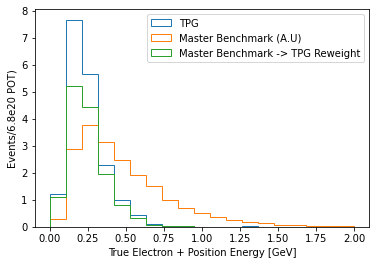

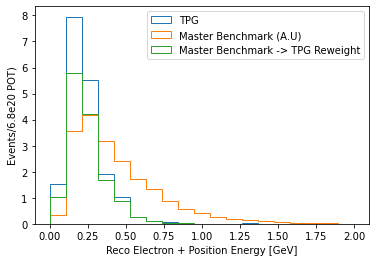

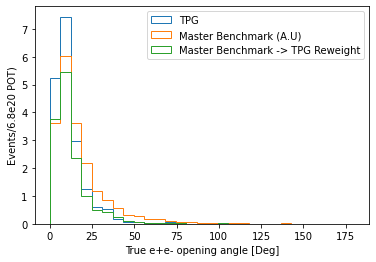

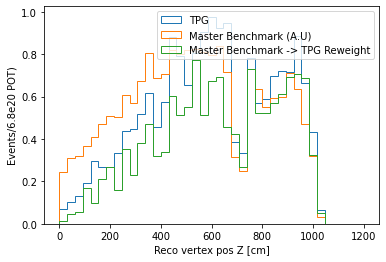

In [391]:
esum_bins=np.linspace(0, 2.0, 20)
plt.hist(gLEE_TPG_fin["true_energy_sum"],bins=esum_bins, weights=TPG_corr_factor*gLEE_TPG_fin["simple_weight"]*gLEE_TPG_fin["pass_selection"], histtype=u'step', label='TPG')
plt.hist(gLEE_Master_fin["true_energy_sum"],bins=esum_bins, weights=10e-4*gLEE_Master_fin["pass_selection"], histtype=u'step', label='Master Benchmark (A.U)' )
plt.hist(gLEE_Master_fin["true_energy_sum"],bins=esum_bins, weights=1*gLEE_Master_fin['simple_weights_toTPG']*gLEE_Master_fin["pass_selection"], histtype=u'step', label='Master Benchmark -> TPG Reweight' )
plt.legend()
plt.ylabel('Events/6.8e20 POT)')
plt.xlabel('True Electron + Position Energy [GeV]')
#plt.yscale('log')
plt.savefig('full_test_truth_Master_to_TPG.pdf')  
plt.show()

plt.hist(gLEE_TPG_fin["reco_energy"]/1000.,bins=esum_bins, weights=TPG_corr_factor*gLEE_TPG_fin["simple_weight"]*gLEE_TPG_fin["pass_selection"], histtype=u'step', label='TPG')
plt.hist(gLEE_Master_fin["reco_energy"]/1000.,bins=esum_bins, weights=10e-4*gLEE_Master_fin["pass_selection"], histtype=u'step', label='Master Benchmark (A.U) ' )
plt.hist(gLEE_Master_fin["reco_energy"]/1000.,bins=esum_bins, weights=1*gLEE_Master_fin['simple_weights_toTPG']*gLEE_Master_fin["pass_selection"], histtype=u'step', label='Master Benchmark -> TPG Reweight' )
plt.legend()
plt.ylabel('Events/6.8e20 POT)')
plt.xlabel('Reco Electron + Position Energy [GeV]')
#plt.yscale('log')
plt.savefig('full_test_reco_Master_to_TPG.pdf')  
plt.show()


theta_bins=np.linspace(0, 180, 30)
plt.hist(gLEE_TPG_fin["true_delta_theta"],bins=theta_bins, weights=TPG_corr_factor*gLEE_TPG_fin["simple_weight"]*gLEE_TPG_fin["pass_selection"], histtype=u'step', label='TPG ')
plt.hist(gLEE_Master_fin["true_delta_theta"],bins=theta_bins, weights=10e-4*gLEE_Master_fin["pass_selection"], histtype=u'step', label='Master Benchmark (A.U) ' )
plt.hist(gLEE_Master_fin["true_delta_theta"],bins=theta_bins, weights=1*gLEE_Master_fin['simple_weights_toTPG']*gLEE_Master_fin["pass_selection"], histtype=u'step', label='Master Benchmark -> TPG Reweight' )
plt.legend()
plt.ylabel('Events/6.8e20 POT)')
plt.xlabel('True e+e- opening angle [Deg]')
#plt.yscale('log')
plt.savefig('full_test_angle_truth_Master_to_TPG.pdf')  
plt.show()

zz_bins=np.linspace(0, 1200, 40)
plt.hist(gLEE_TPG_fin["reco_vertex_z"],bins=zz_bins, weights=TPG_corr_factor*gLEE_TPG_fin["simple_weight"]*gLEE_TPG_fin["pass_selection"], histtype=u'step', label='TPG ')
plt.hist(gLEE_Master_fin["reco_vertex_z"],bins=zz_bins, weights=10e-4*gLEE_Master_fin["pass_selection"], histtype=u'step', label='Master Benchmark (A.U) ' )
plt.hist(gLEE_Master_fin["reco_vertex_z"],bins=zz_bins, weights=1*gLEE_Master_fin['simple_weights_toTPG']*gLEE_Master_fin["pass_selection"], histtype=u'step', label='Master Benchmark -> TPG Reweight' )
plt.legend()
plt.ylabel('Events/6.8e20 POT)')
plt.xlabel('Reco vertex pos Z [cm]')
#plt.yscale('log')
plt.savefig('full_test_vertz_reco_Master_to_TPG.pdf')  
plt.show()

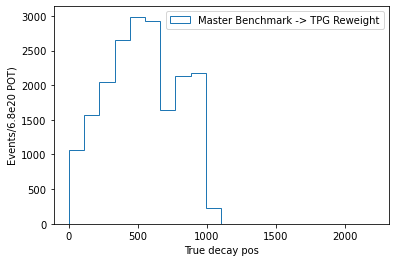

In [348]:
plt.hist(gLEE_Master_fin["true_pos_decay_z"],bins=20, weights=1*gLEE_Master_fin["pass_selection"], histtype=u'step', label='Master Benchmark -> TPG Reweight' )
plt.legend()
plt.ylabel('Events/6.8e20 POT)')
plt.xlabel('True decay pos')
#plt.yscale('log')
plt.show()


# Full Map Test

In [87]:

# bins
bins_energy_e_minus = [0., 0.05, 0.125, 0.2, 0.275, 0.35, 0.425, 0.525, 0.7, 10.]
bins_energy_sum = [0., 0.075, 0.15, 0.225, 0.3, 0.375, 0.45, 0.55, 0.7, 1., 10.]
bins_delta_theta = [0., 1., 2., 5., 10., 20., 45., 90., 180.]
bins_pz_p_e_plus = [-1, 0., 0.5, 0.90, 0.95, 0.97, 0.98, 0.99, 0.995, 0.9975, 1.]
bins_pz_p_e_minus = [-1, 0., 0.5, 0.90, 0.95, 0.97, 0.98, 0.99, 0.995, 0.9975, 1.]
bins_phi_e_minus = np.linspace(-180., 180., 10, endpoint=True)

binning_scheme = (
    bins_energy_e_minus,
    bins_energy_sum,
    bins_delta_theta, 
    bins_pz_p_e_plus, 
    bins_pz_p_e_minus,
    bins_phi_e_minus
)


fmap_BPD = mb.MapBuilder(df_D,df_D.shape[0])
fmap_BPD.run()
dir_tree = os.path.dirname("full_maps/BPD_v1.hdf5")
os.makedirs(dir_tree, exist_ok=True)
fmap_BPD.build(binning_scheme=binning_scheme, file_name="full_maps/BPD_v1.hdf5")

fmap_TPD= mb.MapBuilder(df_TPDelta,df_TPDelta.shape[0])
fmap_TPD.run()
dir_tree = os.path.dirname("full_maps/TPD_v1.hdf5")
os.makedirs(dir_tree, exist_ok=True)
fmap_TPD.build(binning_scheme=binning_scheme, file_name="full_maps/TPD_v1.hdf5")

#load back?
fullm_TPD = h5py.File("full_maps/TPD_v1.hdf5", "r")
fullm_BPD = h5py.File("full_maps/BPD_v1.hdf5", "r")

Time Gen :  0.0028352737426757812
Starting to decay: Sum(w_event_rate)  4992.1346355086935
Time Decay:  0.005461692810058594
Including Weights
Time Gen :  0.0018868446350097656
Starting to decay: Sum(w_event_rate)  109.78698168041419
Time Decay:  0.0018377304077148438
Including Weights


In [113]:
start = time.time()
gLEE_dfD_fin['full_weights_DtoTPD'] = gLEE_dfD_fin.apply(lambda x: getWeight(fullm_BPD,  fullm_TPD, np.array([x['true_energy_e_minus'], x['true_energy_sum'], x['true_delta_theta'], x['true_pz_p_e_plus'],x['true_pz_p_e_minus'], x['true_phi_e_minus']])) , axis=1);
end = time.time()
print(end - start)

#Count some values
print("--- Full BPD to TPD ---")
print("Outside Binning: ",gLEE_dfD_fin[gLEE_dfD_fin['full_weights_DtoTPD']==-999]['full_weights_DtoTPD'].count())
print("Div by Zero: ",gLEE_dfD_fin[gLEE_dfD_fin['full_weights_DtoTPD']==-1e-10]['full_weights_DtoTPD'].count())
print("Zero: ",gLEE_dfD_fin[gLEE_dfD_fin['full_weights_DtoTPD']==0]['full_weights_DtoTPD'].count())
print("Valid: ",gLEE_dfD_fin[gLEE_dfD_fin['full_weights_DtoTPD']>0]['full_weights_DtoTPD'].count())
print("Mean Non-zero Weight: ",gLEE_dfD_fin[gLEE_dfD_fin['full_weights_DtoTPD']>0]['full_weights_DtoTPD'].mean())
print("Mean Weight: ",gLEE_dfD_fin['full_weights_DtoTPD'].mean())


8.47310209274292
--- Full BPD to TPD ---
Outside Binning:  0
Div by Zero:  0
Zero:  11
Valid:  4629
Mean Non-zero Weight:  0.026748257
Mean Weight:  0.026684847


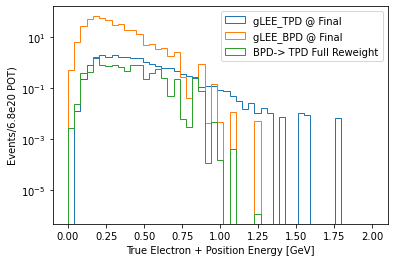

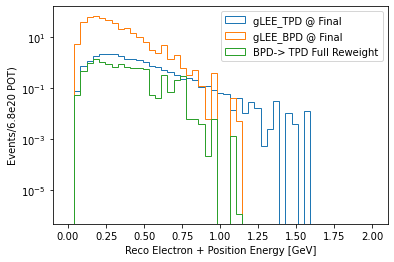

In [95]:
esum_bins=np.linspace(0, 2.0, 50)
plt.hist(gLEE_TPD_fin["true_energy_sum"],bins=esum_bins, weights=TPD_corr_factor*gLEE_TPD_fin["simple_weight"]*gLEE_TPD_fin["pass_selection"], histtype=u'step', label='gLEE_TPD @ Final')
plt.hist(gLEE_dfD_fin["true_energy_sum"],bins=esum_bins, weights=BPD_corr_factor*gLEE_dfD_fin["simple_weight"]*gLEE_dfD_fin["pass_selection"], histtype=u'step', label='gLEE_BPD @ Final' )
plt.hist(gLEE_dfD_fin["true_energy_sum"],bins=esum_bins, weights=BPD_corr_factor*gLEE_dfD_fin['full_weights_DtoTPD']*gLEE_dfD_fin["simple_weight"]*gLEE_dfD_fin["pass_selection"], histtype=u'step', label='BPD-> TPD Full Reweight' )
plt.legend()
plt.ylabel('Events/6.8e20 POT)')
plt.xlabel('True Electron + Position Energy [GeV]')
plt.yscale('log')
plt.savefig('full_test_truth_BPD_to_TPD.pdf')  
plt.show()
esum_bins=np.linspace(0, 2.0, 50)
plt.hist(gLEE_TPD_fin["reco_energy"]/1000.,bins=esum_bins, weights=TPD_corr_factor*gLEE_TPD_fin["simple_weight"]*gLEE_TPD_fin["pass_selection"], histtype=u'step', label='gLEE_TPD @ Final')
plt.hist(gLEE_dfD_fin["reco_energy"]/1000.,bins=esum_bins, weights=BPD_corr_factor*gLEE_dfD_fin["simple_weight"]*gLEE_dfD_fin["pass_selection"], histtype=u'step', label='gLEE_BPD @ Final ' )
plt.hist(gLEE_dfD_fin["reco_energy"]/1000.,bins=esum_bins, weights=BPD_corr_factor*gLEE_dfD_fin['full_weights_DtoTPD']*gLEE_dfD_fin["simple_weight"]*gLEE_dfD_fin["pass_selection"], histtype=u'step', label='BPD-> TPD Full Reweight' )
plt.legend()
plt.ylabel('Events/6.8e20 POT)')
plt.xlabel('Reco Electron + Position Energy [GeV]')
plt.yscale('log')
plt.savefig('full_test_reco_BPD_to_TPD.pdf')  
plt.show()

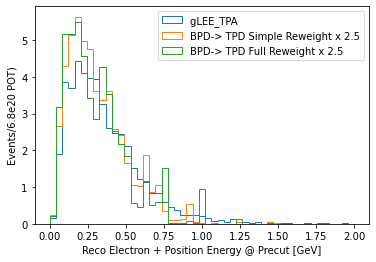

In [92]:
plt.hist(gLEE_TPD_fin["reco_energy"]/1000.,bins=esum_bins, weights=TPD_corr_factor*gLEE_TPD_fin["simple_weight"], histtype=u'step', label='gLEE_TPA ')
plt.hist(gLEE_dfD_fin["reco_energy"]/1000.,bins=esum_bins, weights=2.5*BPD_corr_factor*gLEE_dfD_fin['simple_weights_DtoTPD']*gLEE_dfD_fin["simple_weight"], histtype=u'step', label='BPD-> TPD Simple Reweight x 2.5' )
plt.hist(gLEE_dfD_fin["reco_energy"]/1000.,bins=esum_bins, weights=2.5*BPD_corr_factor*gLEE_dfD_fin['full_weights_DtoTPD']*gLEE_dfD_fin["simple_weight"], histtype=u'step', label='BPD-> TPD Full Reweight x 2.5' )
plt.legend()
plt.ylabel('Events/6.8e20 POT)')
plt.xlabel('Reco Electron + Position Energy @ Precut [GeV]')
plt.savefig('full_v_simple_test_reco_D_to_TPD_precut.pdf')
plt.show()

# Investigating Decay

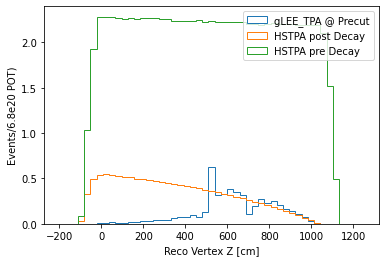

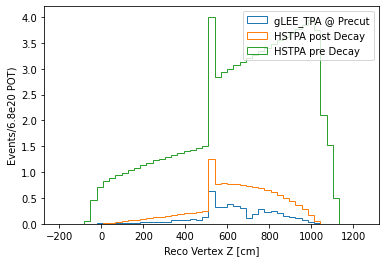

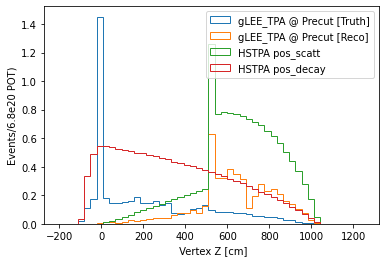

In [62]:
bins=np.linspace(-200, 1250, 50)
f_translate = 518.4+0.1
plt.hist(gLEE_TPAfin["reco_vertex_z"],bins=bins, weights=gLEE_TPAfin["simple_weight"], histtype=u'step', label='gLEE_TPA @ Precut')
plt.hist(df_HSTPA_dec[("pos_scatt","3")].values+f_translate, weights=df_HSTPA_dec["w_event_rate"].values, bins=bins, histtype=u'step', label='HSTPA post Decay');
plt.hist(df_HSTPA_dec[("pos_scatt","3")].values+f_translate, weights=df_HSTPA_dec["w_pre_decay"].values, bins=bins, histtype=u'step', label='HSTPA pre Decay');

plt.legend()
plt.ylabel('Events/6.8e20 POT)')
plt.xlabel('Reco Vertex Z [cm]')
#plt.yscale('log')
#plt.savefig('TPA_BPD_FIN_reco_vertex_z.pdf')  
plt.show()

plt.hist(gLEE_TPAfin["reco_vertex_z"],bins=bins, weights=gLEE_TPAfin["simple_weight"], histtype=u'step', label='gLEE_TPA @ Precut')
plt.hist(df_HSTPA_dec[("pos_decay","3")].values+f_translate, weights=df_HSTPA_dec["w_event_rate"].values, bins=bins, histtype=u'step', label='HSTPA post Decay');
plt.hist(df_HSTPA_dec[("pos_decay","3")].values+f_translate, weights=df_HSTPA_dec["w_pre_decay"].values, bins=bins, histtype=u'step', label='HSTPA pre Decay');

plt.legend()
plt.ylabel('Events/6.8e20 POT)')
plt.xlabel('Reco Vertex Z [cm]')
#plt.yscale('log')
#plt.savefig('TPA_BPD_FIN_reco_vertex_z.pdf')  
plt.show()


plt.hist(gLEE_TPAfin["true_vertex_z"],bins=bins, weights=gLEE_TPAfin["simple_weight"], histtype=u'step', label='gLEE_TPA @ Precut [Truth]')
plt.hist(gLEE_TPAfin["reco_vertex_z"],bins=bins, weights=gLEE_TPAfin["simple_weight"], histtype=u'step', label='gLEE_TPA @ Precut [Reco]')
plt.hist(df_HSTPA_dec[("pos_decay","3")].values+f_translate, weights=df_HSTPA_dec["w_event_rate"].values, bins=bins, histtype=u'step', label='HSTPA pos_scatt');
plt.hist(df_HSTPA_dec[("pos_scatt","3")].values+f_translate, weights=df_HSTPA_dec["w_event_rate"].values, bins=bins, histtype=u'step', label='HSTPA pos_decay');

plt.legend()
plt.ylabel('Events/6.8e20 POT)')
plt.xlabel(' Vertex Z [cm]')
#plt.yscale('log')
#plt.savefig('TPA_BPD_FIN_reco_vertex_z.pdf')  
plt.show()

In [75]:
N_not=(gLEE_TPAfin["true_vertex_z"]!=0).sum()
N_zero=(gLEE_TPAfin["true_vertex_z"]==0).sum()
rat=N_zero/(1.0*N_not+N_zero)
print(N_not,N_zero,rat, 1.0/rat)

3970 1373 0.25697173872356355 3.8914785142024764


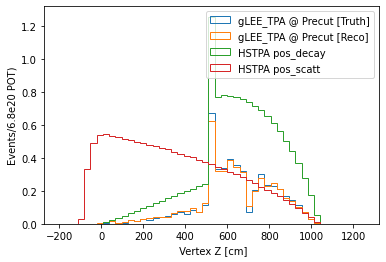

In [87]:
#Same as above, but this time dont use the mctruth_0
plt.hist(gLEE_TPAfin["true_vertex_z"],bins=bins, weights=gLEE_TPAfin["simple_weight"], histtype=u'step', label='gLEE_TPA @ Precut [Truth]')
plt.hist(gLEE_TPAfin["reco_vertex_z"],bins=bins, weights=gLEE_TPAfin["simple_weight"], histtype=u'step', label='gLEE_TPA @ Precut [Reco]')
plt.hist(df_HSTPA_dec[("pos_decay","3")].values+f_translate, weights=df_HSTPA_dec["w_event_rate"].values, bins=bins, histtype=u'step', label='HSTPA pos_decay');
plt.hist(df_HSTPA_dec[("pos_scatt","3")].values+f_translate, weights=df_HSTPA_dec["w_event_rate"].values, bins=bins, histtype=u'step', label='HSTPA pos_scatt');

plt.legend()
plt.ylabel('Events/6.8e20 POT)')
plt.xlabel(' Vertex Z [cm]')
#plt.yscale('log')
#plt.savefig('TPA_BPD_FIN_reco_vertex_z.pdf')  
plt.show()

In [82]:
gLEE_TPAfin

,reco_asso_showers,reco_asso_tracks,m_flash_optfltr_pe_beam,m_flash_optfltr_pe_veto,reco_vertex_x,reco_vertex_y,reco_vertex_z,true_vertex_x,true_vertex_y,true_vertex_z,...,true_pz_p_e_minus,true_phi_e_minus,simple_weight,simple_pot_weight,simple_DarkNu_MultiTop_v4_0COSMIC_mva,simple_DarkNu_MultiTop_v4_0Nue_mva,simple_DarkNu_MultiTop_v4_0BNB_mva,simple_DarkNu_MultiTop_v4_0NCPi0_mva,pass_selection,reco_energy
0,1,0,4959.645996,0.0,3.078532,-26.119707,771.117188,4.626686,-30.467925,679.871542,...,0.999049,-164.306744,0.000182,1.220127e-05,0.986087,0.959009,0.973581,0.982076,False,517.397279
1,1,0,851.156372,0.0,136.593170,-19.268078,721.394165,181.043027,3.502099,404.655761,...,0.983676,-157.110234,0.001284,8.619757e-05,0.998511,0.973566,0.997274,0.952756,False,196.024219
2,1,0,91.044685,0.0,244.701050,63.296268,739.465576,240.422045,64.889491,431.212176,...,0.999466,-57.976692,0.000145,9.763064e-06,0.999101,0.969380,0.996201,0.955140,False,286.582659
3,1,0,476.234436,0.0,46.673378,-72.399681,630.071289,15.364705,-69.651834,188.820056,...,0.985571,-94.392979,0.002774,1.862790e-04,0.994249,0.995002,0.997870,0.844438,True,144.950158
4,1,0,4884.917969,0.0,13.601768,-31.336184,367.396271,26.073540,-51.009299,-7.844227,...,0.995850,139.254020,0.000560,3.757275e-05,0.999964,0.995807,0.999248,0.983144,True,493.987739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5338,1,1,80.442390,0.0,238.663025,-42.911922,291.999908,0.000000,0.000000,0.000000,...,0.970696,-9.084268,0.000730,4.898684e-05,0.999825,0.990915,0.998252,0.965564,True,300.660314
5339,1,0,1054.513184,0.0,70.300369,-68.166107,521.801880,74.233066,-55.081700,5.826462,...,0.979129,91.031290,0.001447,9.716664e-05,0.999898,0.998806,0.999223,0.992393,True,306.205693
5340,1,0,175.746414,0.0,177.347733,-11.349017,634.255066,0.000000,0.000000,0.000000,...,0.954588,1.274049,0.000001,7.187003e-08,0.999586,0.997402,0.999574,0.971625,True,120.398035
5341,1,0,151.926956,0.0,222.056870,-59.950180,876.147644,0.000000,0.000000,0.000000,...,0.984844,-173.284697,0.000259,1.737410e-05,0.999975,0.997560,0.999001,0.994605,True,316.209775


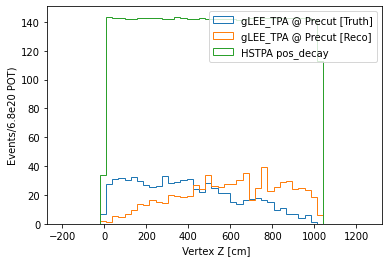

In [81]:
plt.hist(gLEE_dfD["true_vertex_z"],bins=bins, weights=gLEE_dfD["simple_weight"], histtype=u'step', label='gLEE_TPA @ Precut [Truth]')
plt.hist(gLEE_dfD["reco_vertex_z"],bins=bins, weights=gLEE_dfD["simple_weight"], histtype=u'step', label='gLEE_TPA @ Precut [Reco]')
plt.hist(df_HSD[("pos_scatt","3")].values+f_translate, weights=df_HSD["w_event_rate"].values, bins=bins, histtype=u'step', label='HSTPA pos_decay');

plt.legend()
plt.ylabel('Events/6.8e20 POT)')
plt.xlabel(' Vertex Z [cm]')
#plt.yscale('log')
#plt.savefig('TPA_BPD_FIN_reco_vertex_z.pdf')  
plt.show()

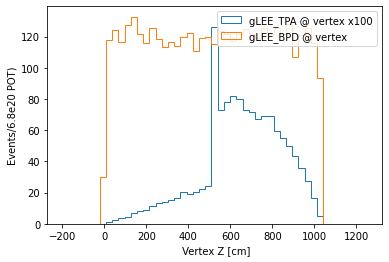

In [93]:
plt.hist(gLEE_TPA["true_vertex_z"],bins=bins, weights=100*gLEE_TPA["textgen_weight"], histtype=u'step', label='gLEE_TPA @ vertex x100')
plt.hist(gLEE_dfD_Bare["true_vertex_z"],bins=bins, weights=gLEE_dfD_Bare["textgen_weight"], histtype=u'step', label='gLEE_BPD @ vertex')

plt.legend()
plt.ylabel('Events/6.8e20 POT)')
plt.xlabel(' Vertex Z [cm]')
#plt.yscale('log')
#plt.savefig('TPA_BPD_FIN_reco_vertex_z.pdf')  
plt.show()

# Things to check

In [ ]:
Perform with and without decay
Perform with and without weights?

Check BDT scores are working for both TPA and BPD


More extremes
Check with TPA?
Check with master?


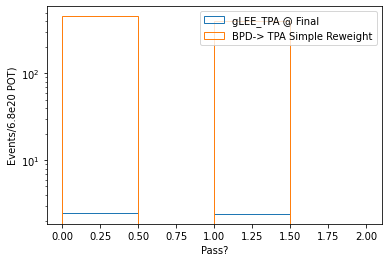

In [16]:
bins=np.linspace(0,2.0,5)
plt.hist(gLEE_TPAfin["pass_selection"]*1.0,bins=bins, weights=gLEE_TPAfin["simple_weight"], histtype=u'step', label='gLEE_TPA @ Final')
plt.hist(gLEE_dfD["pass_selection"],bins=bins, weights=BPD_corr_factor*gLEE_dfD["simple_weight"], histtype=u'step', label='BPD-> TPA Simple Reweight' )
plt.legend()
plt.ylabel('Events/6.8e20 POT)')
plt.xlabel('Pass?')
plt.yscale('log')
plt.savefig('pass.pdf')  
plt.show()


In [31]:
print( (((gLEE_TPAfin["pass_selection"]==1)*1.0).sum()/gLEE_TPAfin.shape[0]), ((gLEE_dfD["pass_selection"]==1)*1.0).sum()/gLEE_dfD.shape[0])

0.49148418491484186 0.44267241379310346
